In [8]:
# Run the below line to install the pre-req library
!pip install networkx

In [9]:
## Load Necessary Library
from __future__ import division
import EAGLE_D as gc  # Graph Compression Library
from scipy import io as sc
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import networkx as nx

### Setting Random Seeds for reproducibility
from numpy.random import seed
seed(123)
import os
os.environ['PYTHONHASHSEED']='0'
import random as rn
rn.seed(123)

In [10]:
# Plotting Function
def PlotGraphs(DAG, Updated_DAG_2nd, pos, mapping, use):
    plt.figure(1)
    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    pos = gc.plot_Graph(DAG, pos, mapping, use)
    plt.title('Original Graph')
    plt.subplot(1, 2, 2)
    gc.plot_Graph(Updated_DAG_2nd, pos, mapping, use)
    plt.title('Summarized Graph')
    plt.tight_layout()
    return pos

In [11]:
## Load Necessar Data (matlab Extraction)
filename='DAG_Original'
DAG=sc.loadmat(np.str(filename)+'.mat')
DAG_Tree=DAG['DAG_Tree']
DAG=DAG['DAG']

In [12]:
## Input parametres
DAG_Size=DAG.shape[1]
Iteration=28;
StartingNode = 0
## Extract The DFS/BFS Tree 
##(if more than 1 source Node, Use the Dummy Node added tree)
Tree_Option='dfs'
## maintain the Tree Connection
Tree_Connect='True'
## Summarization Parameter
CompressionPercent_2nd=.0005
Top_k_Eigenvalue_Number=2
## Plotting Orientation
G = nx.DiGraph(DAG)
pos = nx.random_layout(G)

In [17]:
## Names for the Node
mapping = {}
Names = ['TBI','PTSD','BaPa','SuAb','Depr']

count = 0
yr = 0
for i in range(25):
    mapping[i] = Names[count] + '_Y' + str(yr + 1)
    #print(i, count, Names[count], mapping[i])
    if Names[count] == 'Depr':
        count = 0
        yr += 1
    else:
        count += 1

In [18]:
## Extract The DFS/BFS Tree (if more than 1 source Node, Use the Dummy Node added tree)
tree_matrix,tree=gc.TreeExtraction(DAG,Tree_Option,StartingNode)

## First round of summarization 

In [30]:
# 2nd Eigen value based simplification
Updated_DAG_2nd_1,EigenValue_2nd,NumberofEdges_2nd=gc.GraphCompression_IterationBased(DAG,CompressionPercent_2nd,DAG_Size,Top_k_Eigenvalue_Number,Iteration,tree_matrix,Tree_Connect,StartingNode)
# Print Information
print('Original DAG Size:',np.count_nonzero(DAG))
print('Summarized DAG Size:',np.count_nonzero(Updated_DAG_2nd_1))
Percentage = np.abs(np.count_nonzero(Updated_DAG_2nd_1)-np.count_nonzero(DAG))/np.count_nonzero(DAG)
print('Compression Ratio (Compared to original):',Percentage*100,'%')

PermissionError: [Errno 13] Permission denied: 'Dummy_DAG.mat'

Text(0.5, 1.0, 'Summarized Graph (1st Set)')

<Figure size 432x288 with 0 Axes>

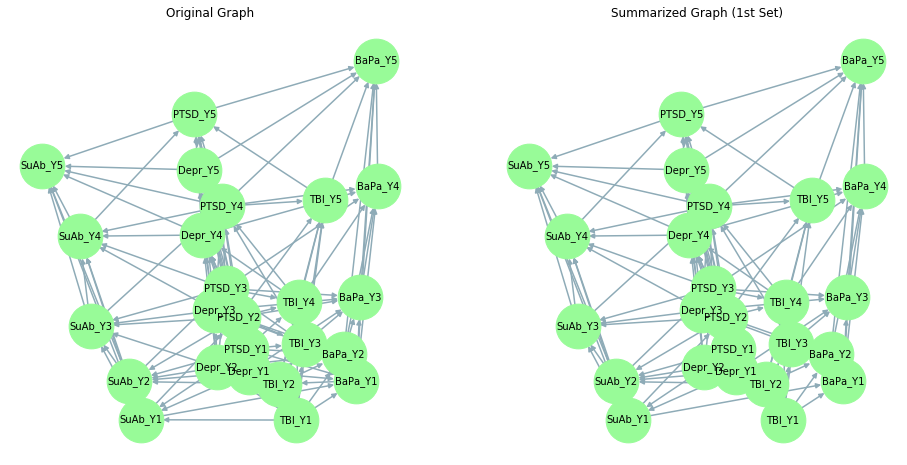

In [31]:
## Plot the Graph
plt.figure(1)
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
pos = gc.plot_Graph(DAG, pos, mapping, use = False)
plt.title('Original Graph')

plt.subplot(1, 2, 2)
gc.plot_Graph(Updated_DAG_2nd_1, pos, mapping, use = True)
plt.title('Summarized Graph (1st Set)')

## Second round of summarization 

In [28]:
# 2nd Eigen value based simplification
Updated_DAG_2nd_2,EigenValue_2nd,NumberofEdges_2nd=gc.GraphCompression_IterationBased(Updated_DAG_2nd_1,CompressionPercent_2nd,Updated_DAG_2nd_1.shape[1],Top_k_Eigenvalue_Number,Iteration,tree_matrix,Tree_Connect,StartingNode)
# Print Information
print('Original DAG Size:',np.count_nonzero(DAG))
print('Summarized DAG Size:',np.count_nonzero(Updated_DAG_2nd_2))
Percentage = np.abs(np.count_nonzero(Updated_DAG_2nd_2)-np.count_nonzero(DAG))/np.count_nonzero(DAG)
print('Compression Ratio (Compared to original):',Percentage*100,'%')

Original DAG Size: 141
Summarized DAG Size: 85
Compression Ratio (Compared to original): 39.71631205673759 %


Text(0.5, 1.0, 'Summarized Graph (2nd Set)')

<Figure size 432x288 with 0 Axes>

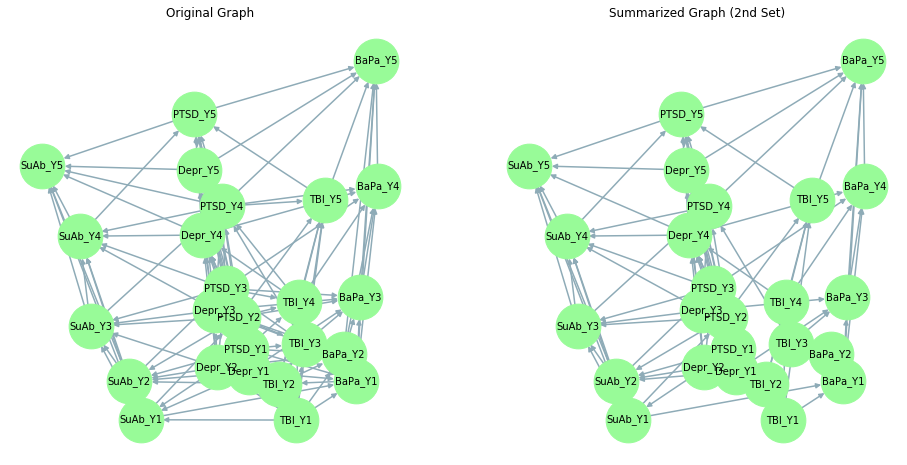

In [29]:
## Plot the Graph
plt.figure(1)
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
pos = gc.plot_Graph(DAG, pos, mapping, use = True)
plt.title('Original Graph')

plt.subplot(1, 2, 2)
gc.plot_Graph(Updated_DAG_2nd_2, pos, mapping, use = True)
plt.title('Summarized Graph (2nd Set)')

## Third round of summarization 

In [ ]:
# 2nd Eigen value based simplification
Updated_DAG_2nd_3,EigenValue_2nd,NumberofEdges_2nd=gc.GraphCompression_IterationBased(Updated_DAG_2nd_2,CompressionPercent_2nd,Updated_DAG_2nd_2.shape[1],Top_k_Eigenvalue_Number,Iteration,tree_matrix,Tree_Connect,StartingNode)
# Print Information
print('Original DAG Size:',np.count_nonzero(DAG))
print('Summarized DAG Size:',np.count_nonzero(Updated_DAG_2nd_3))
Percentage = np.abs(np.count_nonzero(Updated_DAG_2nd_3)-np.count_nonzero(DAG))/np.count_nonzero(DAG)
print('Compression Ratio (Compared to original):',Percentage*100,'%')

Text(0.5, 1.0, 'Summarized Graph (3rd Set)')

<Figure size 432x288 with 0 Axes>

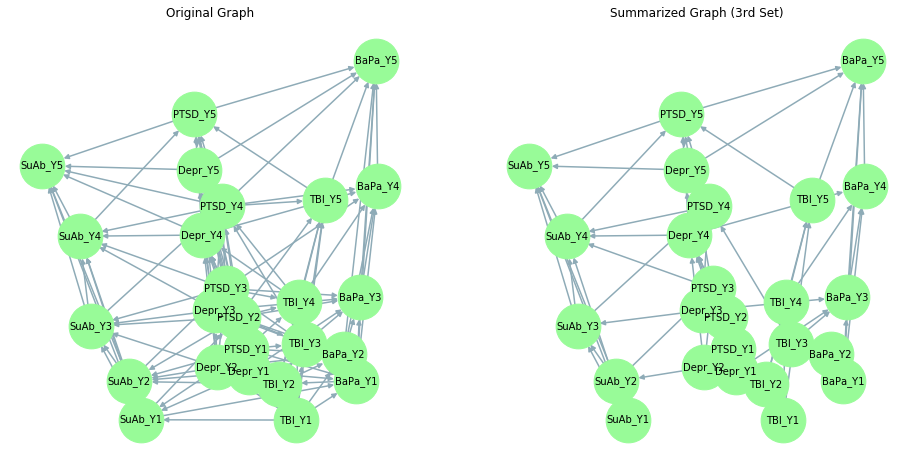

In [13]:
## Plot the Graph
plt.figure(1)
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
pos = gc.plot_Graph(DAG, pos, mapping, use = True)
plt.title('Original Graph')

plt.subplot(1, 2, 2)
gc.plot_Graph(Updated_DAG_2nd_3, pos, mapping, use = True)
plt.title('Summarized Graph (3rd Set)')

# All the Graphs together

In [13]:
plt.figure(1)
plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
pos = gc.plot_Graph(DAG, pos, mapping, use = False)
plt.title('Original Graph')

plt.subplot(2, 2, 2)
gc.plot_Graph(Updated_DAG_2nd_1, pos, mapping, use = True)
plt.title('Summarized Graph (1st Set)')

plt.subplot(2, 2, 3)
gc.plot_Graph(Updated_DAG_2nd_2, pos, mapping, use = True)
plt.title('Summarized Graph (2nd Set)')

plt.subplot(2, 2, 4)
gc.plot_Graph(Updated_DAG_2nd_3, pos, mapping, use = True)
plt.title('Summarized Graph (3rd Set)')

plt.tight_layout()

NameError: name 'plt' is not defined